In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D, MaxPool2D

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from random import shuffle
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

## CNN 특징 맵, 풀링 맵 시각화

In [8]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255

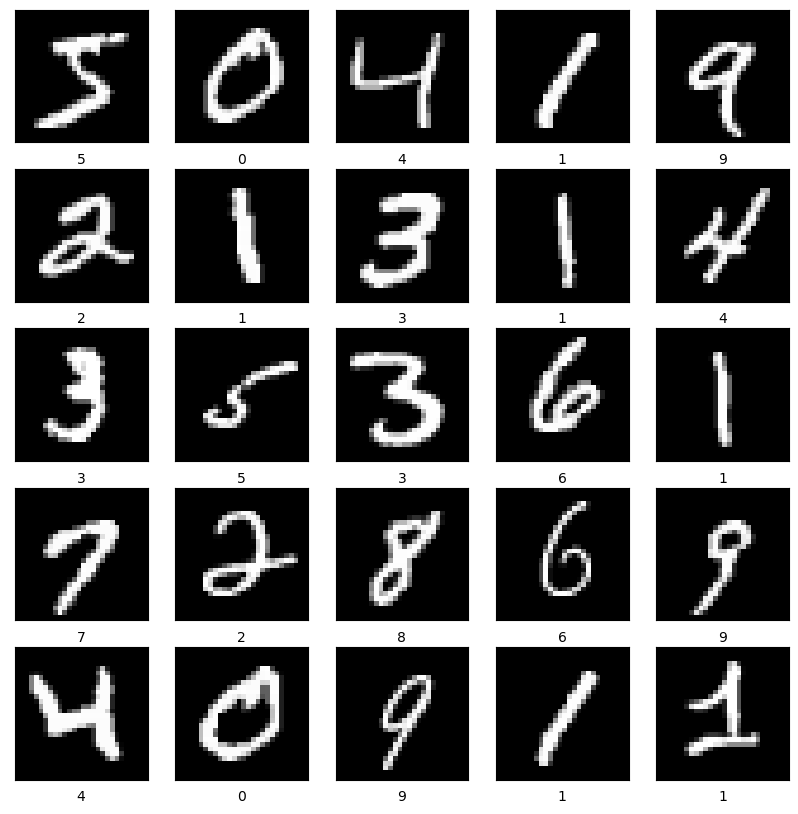

In [9]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(y_train[i]))

- C -> P -> C-> P -> C -> P -> F -> D
- filters: 32, 64, 64
- filter size: 3 * 3
- padding: same

In [10]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [14]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [15]:
model = Sequential()

model.add(Conv2D(32, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, activation='relu', padding='same', input_shape=(28,28,1),kernel_size=3))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

result = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 363us/sample - loss: 0.8686 - acc: 0.7020 - val_loss: 0.1233 - val_acc: 0.9620
Epoch 2/20
60000/60000 [==============================] - 21s 355us/sample - loss: 0.2116 - acc: 0.9362 - val_loss: 0.0679 - val_acc: 0.9787
Epoch 3/20
60000/60000 [==============================] - 24s 400us/sample - loss: 0.1517 - acc: 0.9548 - val_loss: 0.0542 - val_acc: 0.9818
Epoch 4/20
60000/60000 [==============================] - 23s 389us/sample - loss: 0.1238 - acc: 0.9638 - val_loss: 0.0475 - val_acc: 0.9853
Epoch 5/20
60000/60000 [==============================] - 23s 391us/sample - loss: 0.1060 - acc: 0.9683 - val_loss: 0.0397 - val_acc: 0.9873
Epoch 6/20
60000/60000 [==============================] - 24s 407us/sample - loss: 0.0923 - acc: 0.9726 - val_loss: 0.0337 - val_acc: 0.9895
Epoch 7/20
60000/60000 [==============================] - 23s 385us/sample - loss: 0.0881 - acc: 0.9735 

## 학습 전 feature map 시각화

In [17]:
for layer in model.layers:
    if "conv" in layer.name:
        print(layer.name, layer.output.shape)

conv2d_4 (?, 28, 28, 32)
conv2d_5 (?, 9, 9, 64)
conv2d_6 (?, 3, 3, 64)


In [18]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[0].output)
partial_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [19]:
rnd_idx =np.random.randint(0, len(X_test))
print(rnd_idx)

8990


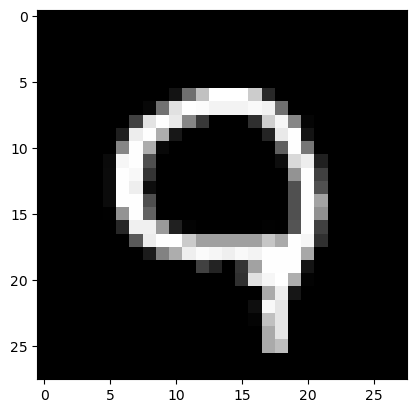

In [20]:
plt.imshow(X_test[3879], cmap="gray")

In [21]:
feature_map = partial_model.predict(X_test[rnd_idx].reshape(-1, 28, 28, 1))
feature_map.shape

(1, 28, 28, 32)

In [22]:
fm = feature_map[0]

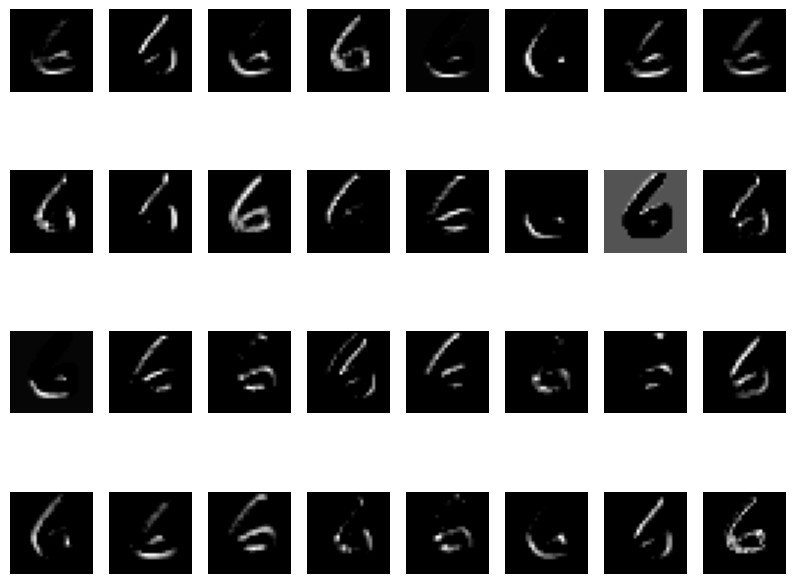

In [24]:
plt.figure(figsize=(10,8))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(fm[:, :, i], cmap="gray")
    plt.axis("off")

## 학습 전 Pooling Map 시각화

In [26]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
partial_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [28]:
pooling_map = partial_model.predict(X_test[rnd_idx].reshape(-1, 28, 28, 1))
pooling_map.shape

(1, 9, 9, 32)

In [29]:
pm = pooling_map[0]

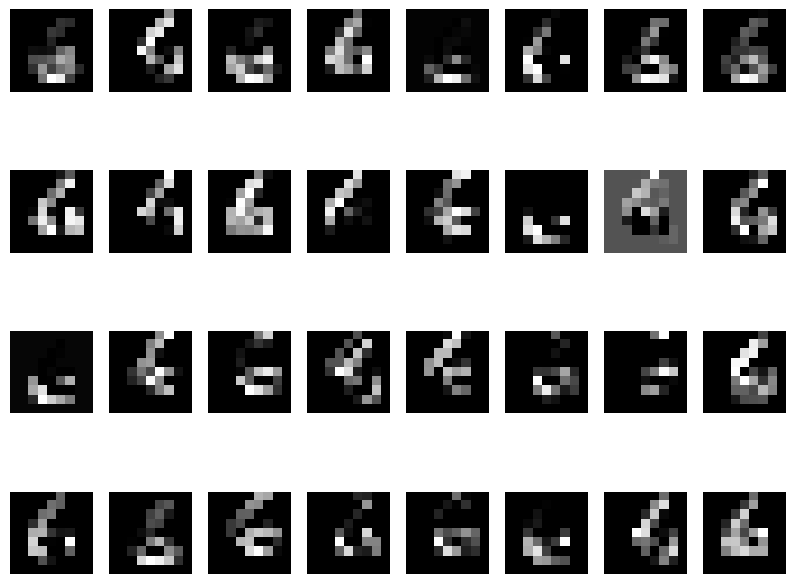

In [31]:
plt.figure(figsize=(10,8))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(pm[:, :, i], cmap="gray")
    plt.axis("off")

## 학습 및 평가

In [38]:
start_time = datetime.now()

result = model.fit(X_train, y_train, epochs=10, validation_split=0.2,
                  batch_size=1000)

end_time = datetime.now()

print("\걸린시간: ", end_time - start_time)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 352us/sample - loss: 0.0441 - acc: 0.9869 - val_loss: 0.0135 - val_acc: 0.9961
Epoch 2/10
48000/48000 [==============================] - 19s 405us/sample - loss: 0.0413 - acc: 0.9878 - val_loss: 0.0128 - val_acc: 0.9962
Epoch 3/10
48000/48000 [==============================] - 18s 373us/sample - loss: 0.0385 - acc: 0.9880 - val_loss: 0.0130 - val_acc: 0.9962
Epoch 4/10
48000/48000 [==============================] - 18s 381us/sample - loss: 0.0389 - acc: 0.9885 - val_loss: 0.0133 - val_acc: 0.9962
Epoch 5/10
48000/48000 [==============================] - 17s 361us/sample - loss: 0.0387 - acc: 0.9881 - val_loss: 0.0134 - val_acc: 0.9960
Epoch 6/10
48000/48000 [==============================] - 17s 356us/sample - loss: 0.0363 - acc: 0.9888 - val_loss: 0.0132 - val_acc: 0.9962
Epoch 7/10
48000/48000 [==============================] - 18s 370us/sample - loss: 0.0393 - acc: 0.9887 

In [41]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 151us/sample - loss: 0.0203 - acc: 0.9938


[0.02028985757067421, 0.9938]

In [43]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

KeyError: 'accuracy'

## 위의 모델을 Model()를 사용하여 변경

In [44]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

# Define input shape
input_shape = (28, 28, 1)

# Define input layer
inputs = Input(shape=input_shape)

# 1st Convolution Layer
x = Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu')(inputs)
x = MaxPool2D(padding='SAME')(x)
x = Dropout(0.25)(x)

# 2nd Convolution Layer
x = Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu')(x)
x = MaxPool2D(padding='SAME')(x)
x = Dropout(0.25)(x)

# 3rd Convolution Layer
x = Conv2D(filters=128, kernel_size=3, padding='SAME', activation='relu')(x)
x = MaxPool2D(padding='SAME')(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


# Print model summary
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0   

## CIFAR10 모델 테스트

In [82]:
print(tf.__version__)

1.15.0


In [83]:
print(keras.__version__)

2.2.4-tf


In [54]:
!pip install --upgrade tensorflow

     -------------------------------------- 266.3/266.3 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.0 MB/s eta 0:00:00
     -------------------------------------- 896.6/896.6 kB 2.6 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
     ---------------------------------------- 6.0/6.0 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 7.0 MB/s eta 0:00:00
     -------------------------------------- 181.3/181.3 kB 5.3 MB/s eta 0:00:00
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing i

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'd:\\wow\\anaconda\\envs\\tf1\\lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [55]:
!pip install --upgrade keras

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [112]:
! pip install --upgrade h5py

  Using cached h5py-3.8.0-cp37-cp37m-win_amd64.whl (2.6 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [113]:
try:
    cnn = load_model("C:\\Users\\ykk12\\Data\\cifar10_accuracy_87v1.h5")
    cnn.summary()
except Exception as err:
    print(str(err))

('Keyword argument not understood:', 'groups')


In [102]:
! pip install opencv-python

In [59]:
import cv2

In [74]:
src_img1 = cv2.imread("C:\\Users\\ykk12\\Data\\racoon.jpg", cv2.IMREAD_COLOR)
src_img2 = cv2.imread("C:\\Users\\ykk12\\Data\\cat2.jpg", cv2.IMREAD_COLOR)
src_img3 = cv2.imread("C:\\Users\\ykk12\\Data\\cat.jpg", cv2.IMREAD_COLOR)
src_img4 = cv2.imread("C:\\Users\\ykk12\\Data\\deft.jpg", cv2.IMREAD_COLOR)
src_img5 = cv2.imread("C:\\Users\\ykk12\\Data\\cat3.jpg", cv2.IMREAD_COLOR)
src_img6 = cv2.imread("C:\\Users\\ykk12\\Data\\cat4.jpg", cv2.IMREAD_COLOR)

In [75]:
print(type(src_img1), src_img1.shape)
print(type(src_img2), src_img2.shape)
print(type(src_img3), src_img3.shape)
print(type(src_img4), src_img4.shape)
print(type(src_img4), src_img5.shape)
print(type(src_img6), src_img6.shape)

<class 'numpy.ndarray'> (420, 630, 3)
<class 'numpy.ndarray'> (399, 600, 3)
<class 'numpy.ndarray'> (467, 700, 3)
<class 'numpy.ndarray'> (853, 1280, 3)
<class 'numpy.ndarray'> (179, 281, 3)
<class 'numpy.ndarray'> (448, 680, 3)


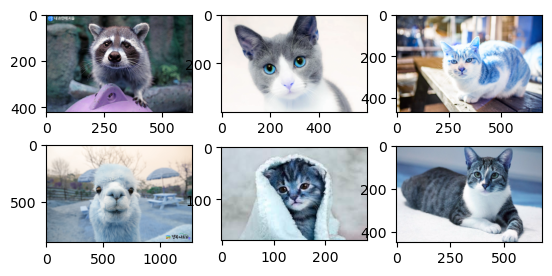

In [76]:
plt.subplot(3,3,1)
plt.imshow(src_img1)

plt.subplot(3,3,2)
plt.imshow(src_img2)

plt.subplot(3,3,3)
plt.imshow(src_img3)

plt.subplot(3,3,4)
plt.imshow(src_img4)

plt.subplot(3,3,5)
plt.imshow(src_img5)

plt.subplot(3,3,6)
plt.imshow(src_img6)


In [79]:
dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2 = cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3 = cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)
dst_img4 = cv2.cvtColor(src_img4, cv2.COLOR_BGR2RGB)
dst_img5 = cv2.cvtColor(src_img5, cv2.COLOR_BGR2RGB)
dst_img6 = cv2.cvtColor(src_img6, cv2.COLOR_BGR2RGB)

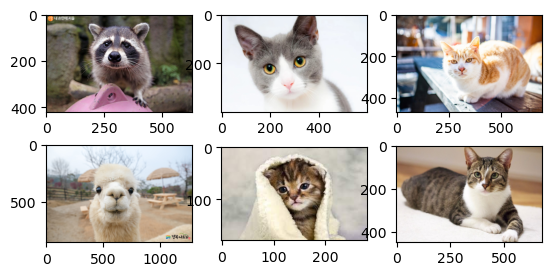

In [80]:
plt.subplot(3,3,1)
plt.imshow(dst_img1)

plt.subplot(3,3,2)
plt.imshow(dst_img2)

plt.subplot(3,3,3)
plt.imshow(dst_img3)

plt.subplot(3,3,4)
plt.imshow(dst_img4)

plt.subplot(3,3,5)
plt.imshow(dst_img5)

plt.subplot(3,3,6)
plt.imshow(dst_img6)


In [91]:
dst_img1 = cv2.resize(dst_img1, dsize =(32,32))
dst_img2 = cv2.resize(dst_img2, dsize =(32,32))
dst_img3 = cv2.resize(dst_img3, dsize =(32,32))
dst_img4 = cv2.resize(dst_img4, dsize =(32,32))
dst_img5 = cv2.resize(dst_img5, dsize =(32,32))
dst_img6 = cv2.resize(dst_img6, dsize =(32,32))

In [92]:
dst_img = [dst_img1, dst_img2, dst_img3, dst_img4, dst_img5, dst_img6]

IndexError: list index out of range

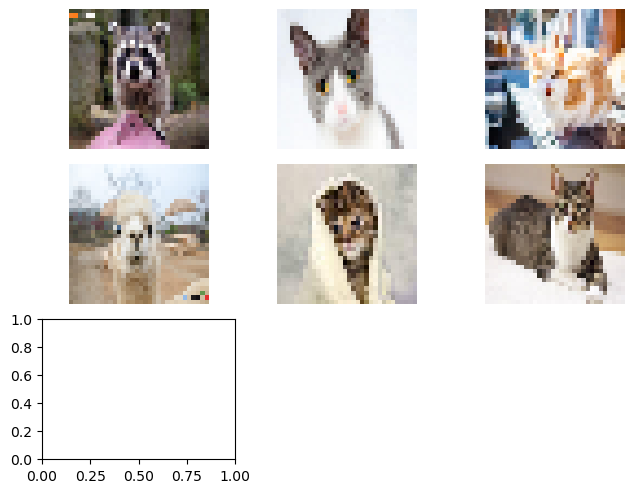

In [99]:
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.imshow(dst_img[i])
    plt.axis("off")
    plt.tight_layout()

In [94]:
print(dst_img1.shape)

(32, 32, 3)


#### 데이터 준비, 4차원으로 변경

In [96]:
dst_img1 = dst_img1/255.0
dst_img2 = dst_img2/255.0
dst_img3 = dst_img3/255.0
dst_img4 = dst_img4/255.0
dst_img5 = dst_img5/255.0
dst_img6 = dst_img6/255.0

In [97]:


test_image_list = []

test_image_list.append(dst_img1)
test_image_list.append(dst_img2)
test_image_list.append(dst_img3)
test_image_list.append(dst_img4)
test_image_list.append(dst_img5)
test_image_list.append(dst_img6)


test_image_array = np.array(test_image_list)
print(test_image_array.shape)

(6, 32, 32, 3)


In [100]:
pred = cnn.predict(test_image_array)

NameError: name 'cnn' is not defined

In [104]:
print(pred.shape)
print(pred)

class_name = ["airplne", "automobile", "bird", "cat", "deer", "dog",
             "frog", "horse", "ship", "truck"]


for i in range(len(pred)):
    class_idx = np.argmax(pred[i])
    print(class_name[class_idx]. pred[i].max())

NameError: name 'pred' is not defined

In [114]:
## 상위 3개 예츠값

## 이미지 예측에 정답 출력하기

- 파일명을 레이블에 맞게 